자료 출처 및 참고 출처
- https://dacon.io/competitions/official/235590/overview/description (데이콘 - 코로나 데이터 시각화 AI 경진대회)

# "ETC"

> "COVID-19 Analysis & Visualization"

- toc:true
- branch: master
- badges: true
- comments: true
- author: HyunsooKim
- categories: [jupyter, python]

## EDA: Exploratory Data Analysis
- Age
- Region
- Sex
- Test
- Path
- Weather
- Patient
- Seoul
- Search
- Policy


In [1]:
## import packages
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from matplotlib import pyplot as plt
import seaborn as sns
#from plotnine import *
from glob import glob
import missingno as msno
import folium

In [2]:
## Get data
Case = pd.read_csv("../notebook/coronavirusdataset/Case.csv")
PatientInfo = pd.read_csv("../notebook/coronavirusdataset/PatientInfo.csv")
#PatientRoute = pd.read_csv("../notebook/coronavirusdataset/PatientRoute.csv")
Policy = pd.read_csv("../notebook/coronavirusdataset/Policy.csv")
Region = pd.read_csv("../notebook/coronavirusdataset/Region.csv")
SearchTrend = pd.read_csv("../notebook/coronavirusdataset/SearchTrend.csv")
SeoulFloating = pd.read_csv("../notebook/coronavirusdataset/SeoulFloating.csv")
Time = pd.read_csv("../notebook/coronavirusdataset/Time.csv")
TimeAge = pd.read_csv("../notebook/coronavirusdataset/TimeAge.csv")
TimeGender = pd.read_csv("../notebook/coronavirusdataset/TimeGender.csv")
TimeProvince = pd.read_csv("../notebook/coronavirusdataset/TimeProvince.csv")
Weather = pd.read_csv("../notebook/coronavirusdataset/Weather.csv")

## Using TimeAge data - 연령에 따른 분석 


In [3]:
display(TimeAge.head())
display(TimeAge.age.unique())

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


array(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'],
      dtype=object)

In [4]:
age_list = TimeAge.age.unique()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


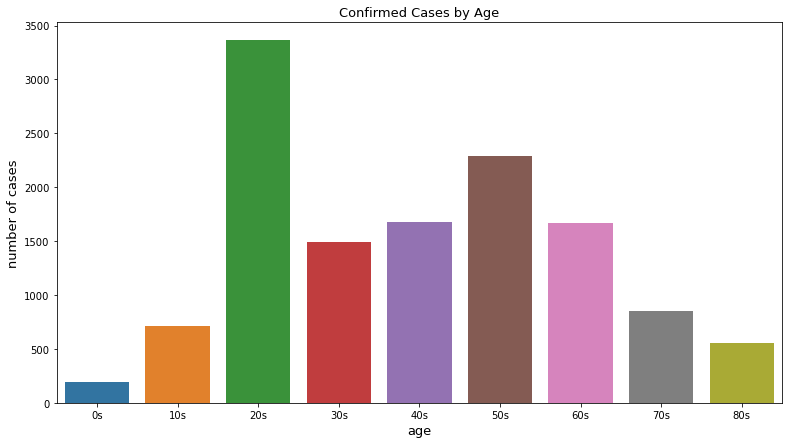

In [5]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.barplot(age_list,TimeAge.confirmed[-9:])
#sns.countplot(PatientInfo['age']) #해당 코드로 진행하면 정렬이 안됨
ax.set_xlabel('age',size=13)
ax.set_ylabel('number of cases',size=13)
plt.title('Confirmed Cases by Age',size=13)
plt.show()

2022년 연령대별 인구

- <https://kosis.kr/visual/populationKorea/experienceYard/populationPyramid.do?mb=N&menuId=M_3_2>

In [6]:
## 1. Get population distribution table
pop_order = pd.DataFrame()
pop_order['age'] = age_list
pop_order['population'] = (3624712, 4588575, 6723892, 6854354, 8085971, 8588003, 7207442, 3768818, 1904624)
pop_order['proportion'] = round(pop_order['population']/sum(pop_order['population']) * 100, 2)
pop_order = pop_order.sort_values('age')
pop_order.set_index(np.arange(1, 10), inplace=True)
display(pop_order)

,age,population,proportion
1,0s,3624712,7.06
2,10s,4588575,8.94
3,20s,6723892,13.10
4,30s,6854354,13.35
5,40s,8085971,15.75
6,50s,8588003,16.73
7,60s,7207442,14.04
8,70s,3768818,7.34
9,80s,1904624,3.71


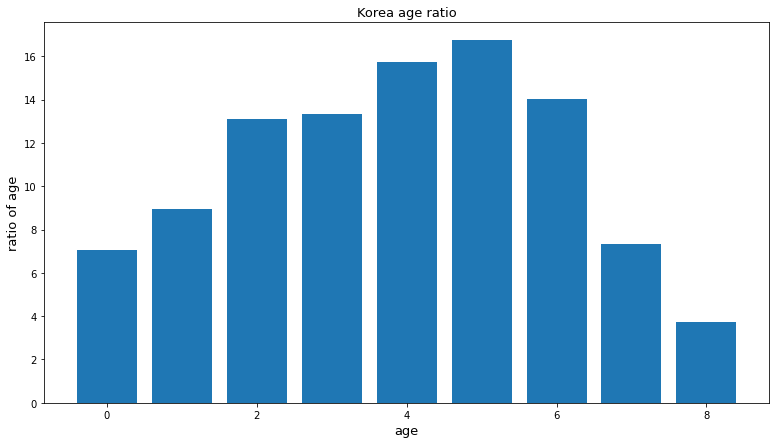

In [7]:
# 연령별 비율
fig, ax = plt.subplots(figsize=(13, 7))
plt.bar(range(len(pop_order)),pop_order['proportion'])
ax.set_xlabel('age',size=13)
ax.set_ylabel('ratio of age',size=13)
plt.title('Korea age ratio',size=13)
plt.show()

,age,population,proportion,confirmed,confirmed_rate
1,0s,3624712,7.06,193,0.005325
2,10s,4588575,8.94,708,0.015430
3,20s,6723892,13.10,3362,0.050001
4,30s,6854354,13.35,1496,0.021826
5,40s,8085971,15.75,1681,0.020789
6,50s,8588003,16.73,2286,0.026619
7,60s,7207442,14.04,1668,0.023143
8,70s,3768818,7.34,850,0.022553
9,80s,1904624,3.71,556,0.029192


NameError: name 'color_list' is not defined

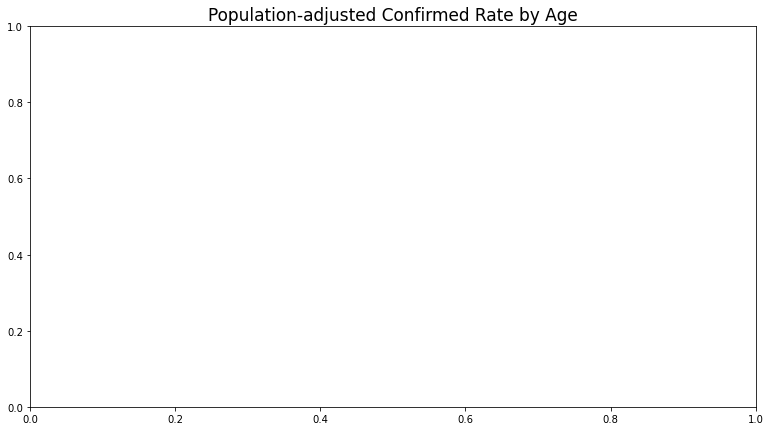

In [8]:
## 1. Get a new table with population / proportion by age
confirmed_by_population = pop_order.sort_values('age')
confirmed_by_population['confirmed'] = list(TimeAge[-9:].confirmed)

## 2. Get confirmed ratio regarding population
confirmed_by_population['confirmed_rate'] = confirmed_by_population['confirmed']/confirmed_by_population['population'] * 100;
display(confirmed_by_population)

## 3. Plot confirmed rate by age
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Population-adjusted Confirmed Rate by Age', fontsize=17)
ax.bar(age_list, confirmed_by_population.confirmed_rate[-9:], color=color_list)
ax.set_xlabel('Age', size=13)
ax.set_ylabel('Confirmed rate (%)', size=13)
plt.show()

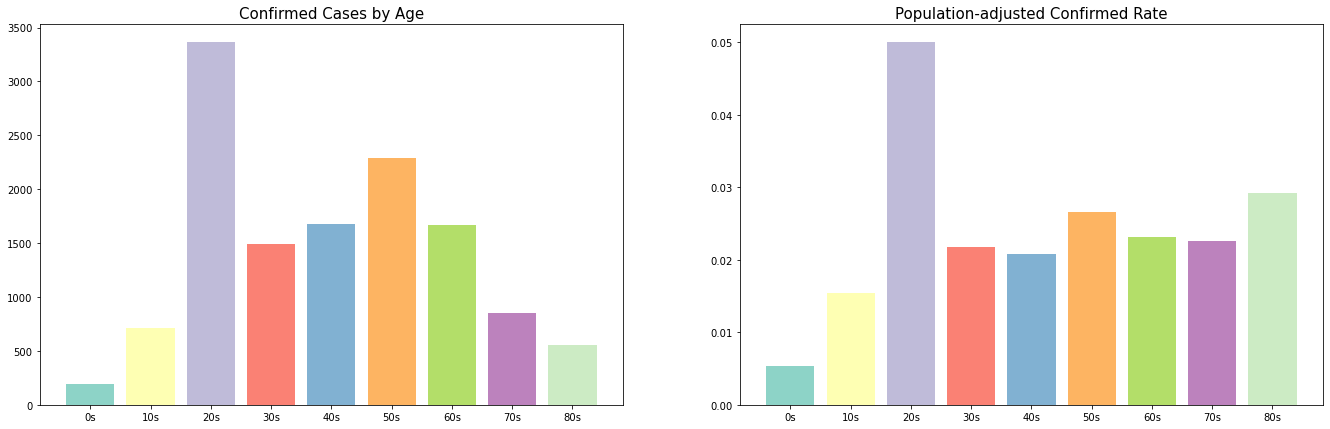

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))

## 1. Absolute numbers
axes[0].set_title('Confirmed Cases by Age', fontsize=15)
axes[0].bar(age_list, confirmed_by_population.confirmed, color=color_list)

## 2. Confirmed rate
axes[1].set_title('Population-adjusted Confirmed Rate', fontsize=15)
axes[1].bar(age_list, confirmed_by_population.confirmed_rate, color=color_list)

plt.show()

1. The older, the more prone to get infected in general
2. 50s's big portion shrinks because they are the largest age group
3. 20s are the outlier as they are midsize but the most infected group

age
0s     AxesSubplot(0.125,0.125;0.775x0.755)
10s    AxesSubplot(0.125,0.125;0.775x0.755)
20s    AxesSubplot(0.125,0.125;0.775x0.755)
30s    AxesSubplot(0.125,0.125;0.775x0.755)
40s    AxesSubplot(0.125,0.125;0.775x0.755)
50s    AxesSubplot(0.125,0.125;0.775x0.755)
60s    AxesSubplot(0.125,0.125;0.775x0.755)
70s    AxesSubplot(0.125,0.125;0.775x0.755)
80s    AxesSubplot(0.125,0.125;0.775x0.755)
Name: confirmed, dtype: object

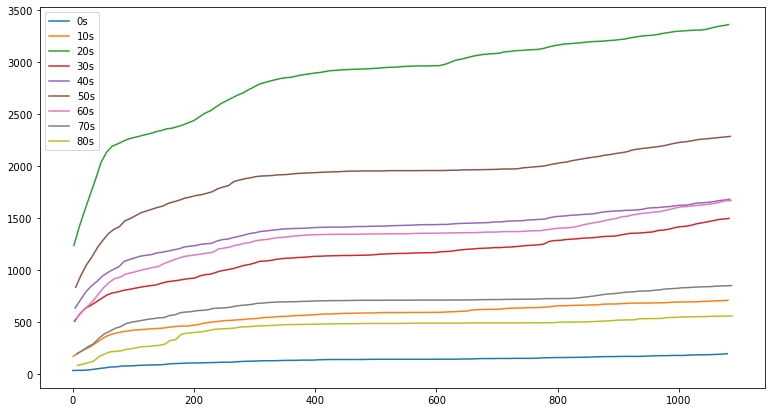

In [ ]:
## Plot time series of confirmed cases
fig, ax = plt.subplots(figsize=(13, 7))
TimeAge.groupby('age')['confirmed'].plot(legend=True)


[Latest deceased cases]


,0,1,2,3,4,5,6,7,8
age,0s,10s,20s,30s,40s,50s,60s,70s,80s
deceased,0,0,0,2,3,15,41,82,139


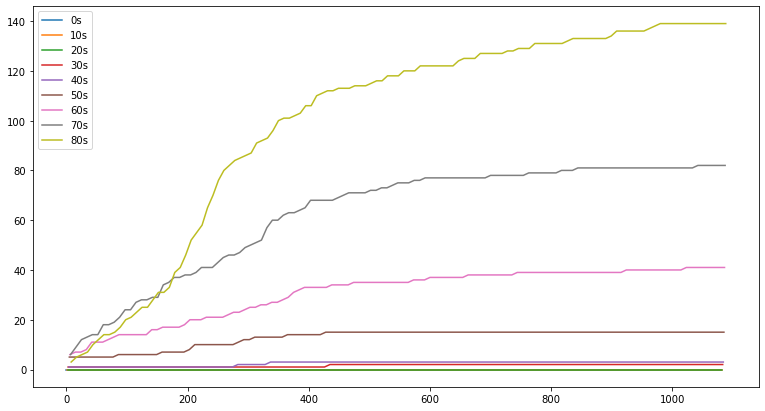

In [ ]:
## 1. Plot time series of deceased cases
fig, ax = plt.subplots(figsize=(13, 7))
TimeAge.groupby('age')['deceased'].plot(legend=True)

## 2. Check absolute numbers
age_deceased = TimeAge.tail(9)[['age', 'deceased']]
age_deceased.set_index(np.arange(0, len(TimeAge.age.unique())), inplace=True)
print('[Latest deceased cases]')
display(age_deceased.T)

1. 80s show more than 2 times higher deceased rate than 70s
2. The deceased rates of 80s and 70s behgan decreasing at the end of May (more cases, less deceased)
3. The other groups have shown stable rates up to now

## Using TimeGender - 사용할지 잘 모르겠음

In [ ]:
TimeGender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


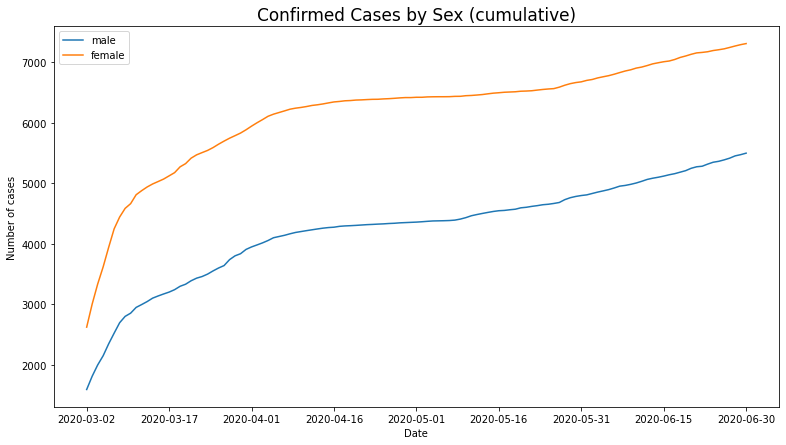

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Confirmed Cases by Sex (cumulative)', fontsize=17)
sex_confirmed = (TimeGender[TimeGender.sex=='male'].confirmed, TimeGender[TimeGender.sex=='female'].confirmed)
for sex_each, sex_label in zip(sex_confirmed, ['male', 'female']):
    plt.plot(TimeGender.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[::int(len(TimeGender.date.unique())/8)])
plt.xlabel('Date')
plt.ylabel('Number of cases')
ax.legend()
plt.show()

1. There have been more female patients for all the documented time
2. The gap has been growing up to 2020-04-06 and stabilized after then
3. More males got infected daily from starting of May

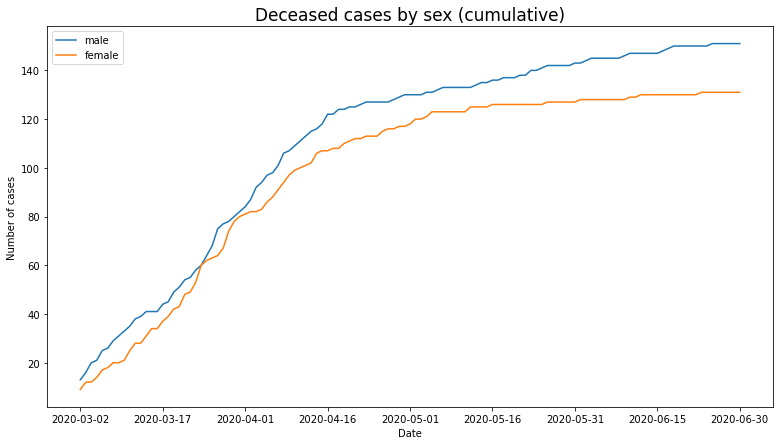

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Deceased cases by sex (cumulative)', fontsize=17)
sex_deceased = (TimeGender[TimeGender.sex=='male'].deceased, TimeGender[TimeGender.sex=='female'].deceased)

for sex_each, sex_label in zip(sex_deceased, ['male', 'female']):
    plt.plot(TimeGender.date.unique(), sex_each, label=sex_label)
ax.set_xticks(ax.get_xticks()[::int(len(TimeGender.date.unique())/8)])
plt.xlabel('Date')
plt.ylabel('Number of cases')
ax.legend()
plt.show()

1. There have been more deceased males almost all the time
2. The gap is narrower than that of confirmed cases
3. Some underlying factors could cause male's higher fatality (e.g. smoking)

## using searchTrend

1. More than 4 years of search trends on 4 topics related to respiratory diseases (cold / flu / pneumonia / coronavirus)
2. 100% means the highest interest in the time range while the others are relative to this
3. Data provider: Naver (one of the influential search engines in S.Korea, market share=17.42%)

In [ ]:
SearchTrend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


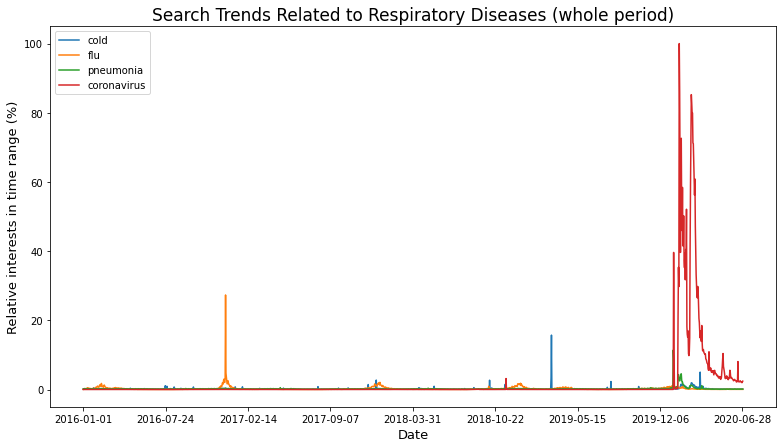

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Search Trends Related to Respiratory Diseases (whole period)', size=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Relative interests in time range (%)', size=13)
for column in SearchTrend.columns[1:]:
    plt.plot(SearchTrend.date, SearchTrend[column])
ax.set_xticks(ax.get_xticks()[::int(len(SearchTrend.date.unique())/8)])
ax.legend(labels=('cold','flu','pneumonia','coronavirus'))
plt.show()


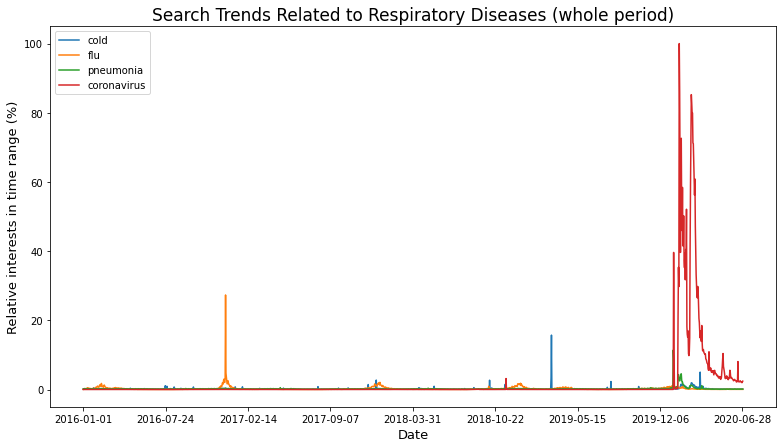

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Search Trends Related to Respiratory Diseases (whole period)', size=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Relative interests in time range (%)', size=13)
for column in SearchTrend.columns[1:]:
    plt.plot(SearchTrend.date, SearchTrend[column])
ax.set_xticks(ax.get_xticks()[::int(len(SearchTrend.date.unique())/8)])
ax.legend(labels=('cold','flu','pneumonia','coronavirus'))
plt.show()

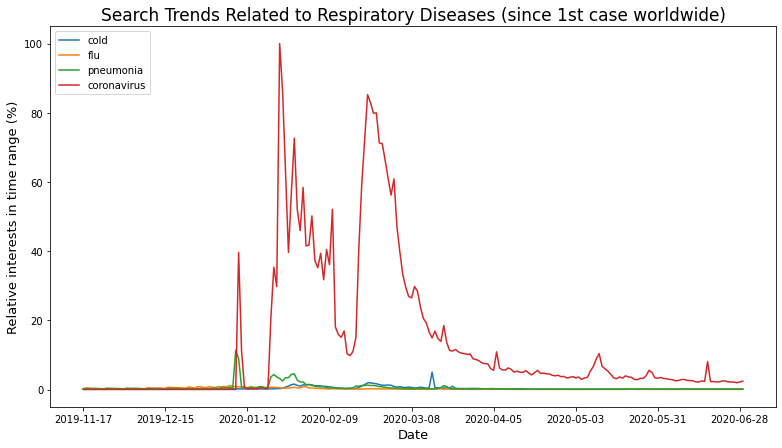

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))
plt.title('Search Trends Related to Respiratory Diseases (since 1st case worldwide)', size=17)
ax.set_xlabel('Date', size=13)
ax.set_ylabel('Relative interests in time range (%)', size=13)
for column in SearchTrend.columns[1:]:
    plt.plot(SearchTrend.date[SearchTrend.date >= '2019-11-17']
             , SearchTrend[SearchTrend.date >= '2019-11-17'][column])
ax.set_xticks(ax.get_xticks()[::int(len(SearchTrend.date[SearchTrend.date >= '2019-11-17'])/8)]) 
ax.legend(labels=('cold','flu','pneumonia','coronavirus'),loc='upper left')          
plt.show()

1. No distinct change had occured for about 1 and half months
2. Increase of searching pneumonia was prior to that of coronavirus(COVID-19)
    - because it's called Wuhan pneumonia at first in S.Korea
        - Wuhan is the assumed place where COVID-19 pandemic started
3. After then coronavirus kept dominating the search trends
    - on 2020-01-23 (3 days after the 1st case of S.Korea) it reached 100% interests in this time range